 # Explanatory Data Analysis & Visualization (Baby Names in the US)

## Importing and Merging baby names text files

In [16]:
import pandas as pd

In [17]:
years = list(range(1880, 2022))

In [18]:
dataframes = []
for year in years:
    data = pd.read_csv("yob{}.txt".format(year), header = None, 
                       names = ["Name", "Gender", "Count"])
    dataframes.append(data)

In [19]:
len(dataframes)

142

In [20]:
df = pd.concat(dataframes,  axis = 0, keys = years, names = ["Year"]).droplevel(-1).reset_index()
df.head()

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052272 entries, 0 to 2052271
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 62.6+ MB


In [22]:
df.to_csv("us_baby_names.csv", index = False)

## First Inspection: The most popular Names in 2021

In [23]:
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [24]:
df = pd.read_csv("us_baby_names.csv")

In [25]:
df.nunique()

Year         142
Name      101312
Gender         2
Count      13842
dtype: int64

In [26]:
df.Gender = df.Gender.astype("category")

In [27]:
def most_pop(year, gender, n):
    return df[(df.Year == year) & (df.Gender == gender)].nlargest(n, "Count")

Most popular female names in 2021:

In [28]:
most_pop(2021, "F", 10)

,Year,Name,Gender,Count
2020735,2021,Olivia,F,17728
2020736,2021,Emma,F,15433
2020737,2021,Charlotte,F,13285
2020738,2021,Amelia,F,12952
2020739,2021,Ava,F,12759
2020740,2021,Sophia,F,12496
2020741,2021,Isabella,F,11201
2020742,2021,Mia,F,11096
2020743,2021,Evelyn,F,9434
2020744,2021,Harper,F,8388


Most popular male names in 2021

In [29]:
most_pop(2021, "M", 10)

,Year,Name,Gender,Count
2038279,2021,Liam,M,20272
2038280,2021,Noah,M,18739
2038281,2021,Oliver,M,14616
2038282,2021,Elijah,M,12708
2038283,2021,James,M,12367
2038284,2021,William,M,12088
2038285,2021,Benjamin,M,11791
2038286,2021,Lucas,M,11501
2038287,2021,Henry,M,11307
2038288,2021,Theodore,M,9535


## Evergreen Names (1880 - 2021)

Most popular female names of 2021:

In [30]:
f_2021 = most_pop(2021, "F", 5)
f_2021

,Year,Name,Gender,Count
2020735,2021,Olivia,F,17728
2020736,2021,Emma,F,15433
2020737,2021,Charlotte,F,13285
2020738,2021,Amelia,F,12952
2020739,2021,Ava,F,12759


Most popular female names of 1880:

In [31]:
f_1880 = most_pop(1880, "F", 5)
f_1880

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


Most popular female names of present in both 1880 and 2021:

In [32]:
f_evergreen = f_2021[["Name", "Count"]].merge(f_1880[["Name", "Count"]], how = "inner", on = "Name", 
                           suffixes=("_2021", "_1880"))
f_evergreen

,Name,Count_2021,Count_1880
0,Emma,15433,2003


Most popular male names in 2021:

In [33]:
m_2021 = most_pop(2021, "M", 5)
m_2021

,Year,Name,Gender,Count
2038279,2021,Liam,M,20272
2038280,2021,Noah,M,18739
2038281,2021,Oliver,M,14616
2038282,2021,Elijah,M,12708
2038283,2021,James,M,12367


Most popular male names in 1880:

In [34]:
m_1880 = most_pop(1880, "M", 5)
m_1880

,Year,Name,Gender,Count
942,1880,John,M,9655
943,1880,William,M,9532
944,1880,James,M,5927
945,1880,Charles,M,5348
946,1880,George,M,5126


Most popular male names of present in both 1880 and 2021:

In [35]:
m_evergreen = m_2021[["Name", "Count"]].merge(m_1880[["Name", "Count"]], how = "inner", on = "Name", 
                                              suffixes=("_2021", "_1880"))
m_evergreen

,Name,Count_2021,Count_1880
0,James,12367,5927


## Advanced Data Aggregation

In [36]:
df = pd.read_csv("us_baby_names.csv")

In [39]:
df.head()

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [38]:
df.groupby(["Name", "Gender"]).Count.sum().reset_index(level = -1)

,Gender,Count
Name,,
Aaban,M,120
Aabha,F,51
Aabid,M,16
Aabidah,F,5
Aabir,M,10
...,...,...
Zyvion,M,5
Zyvon,M,7
Zyyanna,F,6


In [40]:
agg = df.groupby(["Name", "Gender"]).agg(Total = ("Count", "sum"), No_Year = ("Count", "count"), 
                                         First_Year = ("Year", "min"), Last_Year = ("Year", "max"),
                                         Max_Count = ("Count", "max"))

In [41]:
agg

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,120,12,2007,2019,16
Aabha,F,51,8,2011,2021,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


Finding most used year for every name:

In [42]:
def best_year(group):
    return group.nlargest(1, "Count").Year

In [43]:
best_y = df.groupby(["Name", "Gender"]).apply(best_year)

In [44]:
best_y

Name     Gender         
Aaban    M       1817711    2014
Aabha    F       1803981    2014
Aabid    M       1953871    2018
Aabidah  F       1940666    2018
Aabir    M       1890403    2016
                            ... 
Zyvion   M       1658038    2009
Zyvon    M       1856007    2015
Zyyanna  F       1675008    2010
Zyyon    M       1824324    2014
Zzyzx    M       1692111    2010
Name: Year, Length: 112590, dtype: int64

In [45]:
best_y.droplevel(-1)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 112590, dtype: int64

In [46]:
#Adding the new generated column to the original dataframe
agg["Best_Year"] = best_y.droplevel(-1)

In [47]:
agg.reset_index(inplace = True)

Finally, we have statistics for all names together:

In [48]:
agg.head()

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Aaban,M,120,12,2007,2019,16,2014
1,Aabha,F,51,8,2011,2021,9,2014
2,Aabid,M,16,3,2003,2018,6,2018
3,Aabidah,F,5,1,2018,2018,5,2018
4,Aabir,M,10,2,2016,2018,5,2016


Trying to find details of a specific name "Mary" who is a male:

In [50]:
agg[(agg.Name == "Mary") & (agg.Gender == "M")]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
70776,Mary,M,15170,132,1880,2020,340,1930


## Most Popular Names of all Times

In [51]:
all_times = agg.groupby("Gender").apply(lambda x: x.nlargest(10, "Total")).reset_index(drop = True)
all_times

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Mary,F,4132219,142,1880,2021,73985,1921
1,Elizabeth,F,1660769,142,1880,2021,20744,1990
2,Patricia,F,1572726,138,1884,2021,56442,1951
3,Jennifer,F,1469336,104,1916,2021,63603,1972
4,Linda,F,1453686,142,1880,2021,99689,1947
5,Barbara,F,1435272,142,1880,2021,48792,1947
6,Margaret,F,1255633,142,1880,2021,28467,1921
7,Susan,F,1122428,142,1880,2021,47402,1955
8,Dorothy,F,1109390,142,1880,2021,39999,1924
9,Sarah,F,1086969,142,1880,2021,28484,1982


In [52]:
import seaborn as sns
plt.style.use("seaborn")

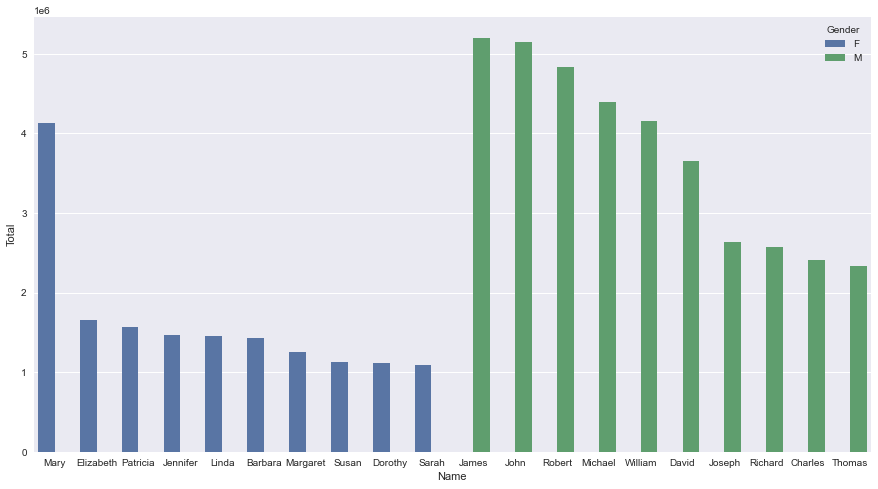

In [55]:
plt.figure(figsize = (15, 8))
sns.barplot(x = "Name", y = "Total", data = all_times, hue = "Gender")
plt.show()

## General Trends over time (1880 - 2021)

In [56]:
pd.options.display.float_format = '{:.0f}'.format

In [57]:
babies_per_year = df.groupby("Year").Count.sum()

In [59]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2017    3561975
2018    3508655
2019    3461444
2020    3327419
2021    3361375
Name: Count, Length: 142, dtype: int64

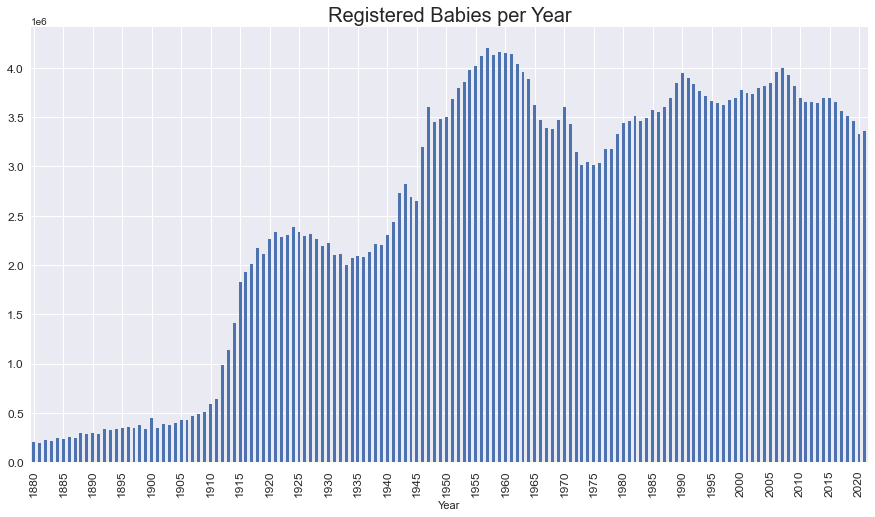

In [68]:
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 8), fontsize = 12)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

In [69]:
diff_names = df.groupby("Year").Name.count()
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2017    32590
2018    32196
2019    32073
2020    31453
2021    31537
Name: Name, Length: 142, dtype: int64

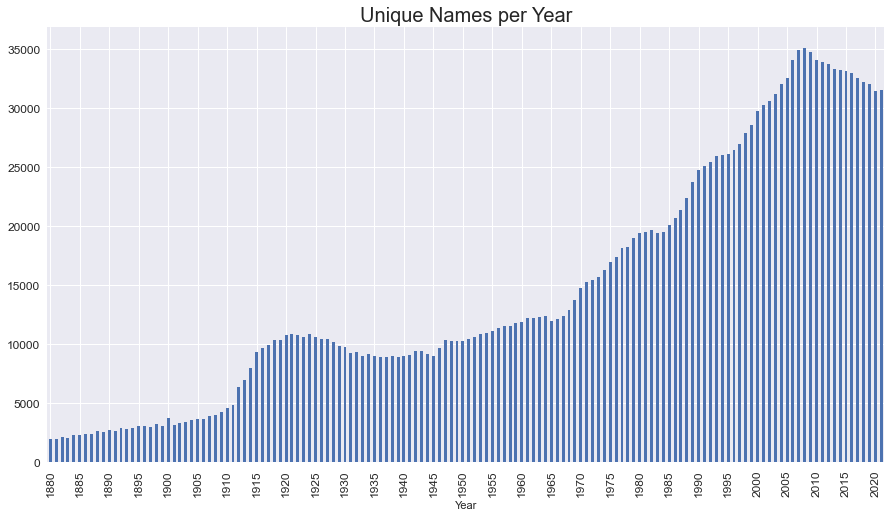

In [70]:
diff_names.plot(kind = "bar", figsize = (15, 8), fontsize = 12)
plt.xticks(ticks = (range(0, len(diff_names), 5)))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

As we can see, the names are getting more unique with every passing year, considering the increase in baby births.

## Creating the Features "Popularity" and "Rank"

__Popularity (babies per million)__

In [71]:
df.groupby(["Year", "Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
2052267    1734277
2052268    1734277
2052269    1734277
2052270    1734277
2052271    1734277
Name: Count, Length: 2052272, dtype: int64

In [72]:
df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
2052267       3
2052268       3
2052269       3
2052270       3
2052271       3
Name: Count, Length: 2052272, dtype: float64

In [73]:
df["Popularity"] = df.Count.div(df.groupby(["Year", "Gender"]).Count.transform("sum"))*1000000

Adding Popularity a name in a particular year to the dataframe:

In [74]:
df

,Year,Name,Gender,Count,Popularity
0,1880,Mary,F,7065,77642
1,1880,Anna,F,2604,28617
2,1880,Emma,F,2003,22012
3,1880,Elizabeth,F,1939,21309
4,1880,Minnie,F,1746,19188
...,...,...,...,...,...
2052267,2021,Zyeire,M,5,3
2052268,2021,Zyel,M,5,3
2052269,2021,Zyian,M,5,3
2052270,2021,Zylar,M,5,3


__Rank__

In [75]:
df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

0             1
1             2
2             3
3             4
4             5
           ... 
2052267   13023
2052268   13023
2052269   13023
2052270   13023
2052271   13023
Name: Count, Length: 2052272, dtype: float64

Adding Rank by Popularity a name in a particular year to the dataframe:

In [76]:
df["Rank"] =  df.groupby(["Year", "Gender"]).Count.apply(lambda x: x.rank(ascending = False))

In [77]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
2052267,2021,Zyeire,M,5,3,13023
2052268,2021,Zyel,M,5,3,13023
2052269,2021,Zyian,M,5,3,13023
2052270,2021,Zylar,M,5,3,13023


Finding 10 most popular male names in 2021:

In [79]:
df[(df.Year == 2021) & (df.Gender == "M")].head(10)

,Year,Name,Gender,Count,Popularity,Rank
2038279,2021,Liam,M,20272,11689,1
2038280,2021,Noah,M,18739,10805,2
2038281,2021,Oliver,M,14616,8428,3
2038282,2021,Elijah,M,12708,7328,4
2038283,2021,James,M,12367,7131,5
2038284,2021,William,M,12088,6970,6
2038285,2021,Benjamin,M,11791,6799,7
2038286,2021,Lucas,M,11501,6632,8
2038287,2021,Henry,M,11307,6520,9
2038288,2021,Theodore,M,9535,5498,10


## Visualizing Name Trends over Time

In [80]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
2052267,2021,Zyeire,M,5,3,13023
2052268,2021,Zyel,M,5,3,13023
2052269,2021,Zyian,M,5,3,13023
2052270,2021,Zylar,M,5,3,13023


Making a function to plot graphs fro different names:

In [85]:
def plot_name(name, gender, crit = "Popularity"):
    data = df.loc[(df.Name == name) & (df.Gender == gender), ["Name", "Gender", "Year", "Rank", crit]]
    data = data.set_index("Year")
    
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(x = data.index, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.index, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel(crit, fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

Analysing the names "Mary" and "James" over the years:

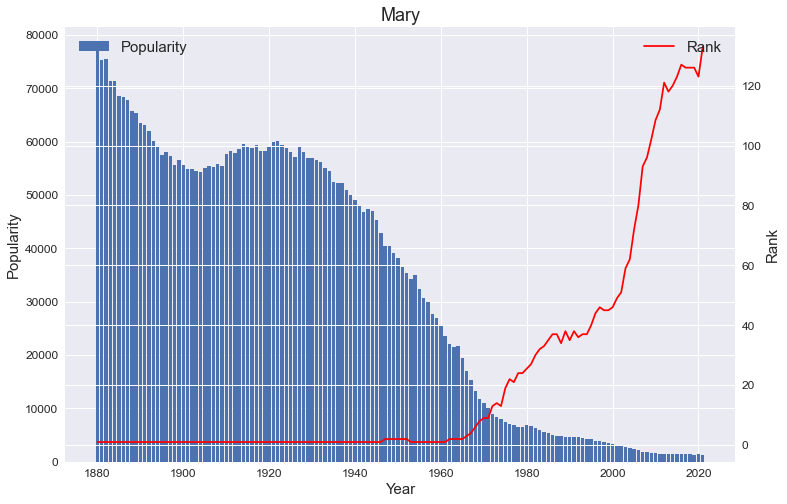

In [86]:
plot_name("Mary", "F")

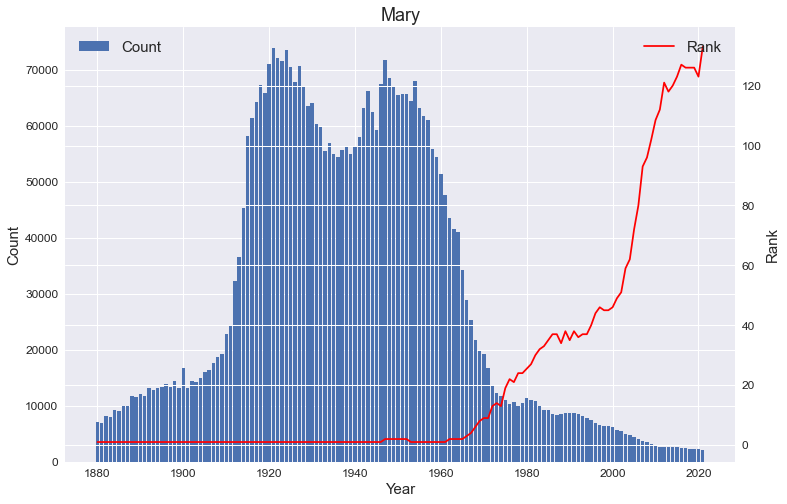

In [87]:
plot_name("Mary", "F", crit = "Count")

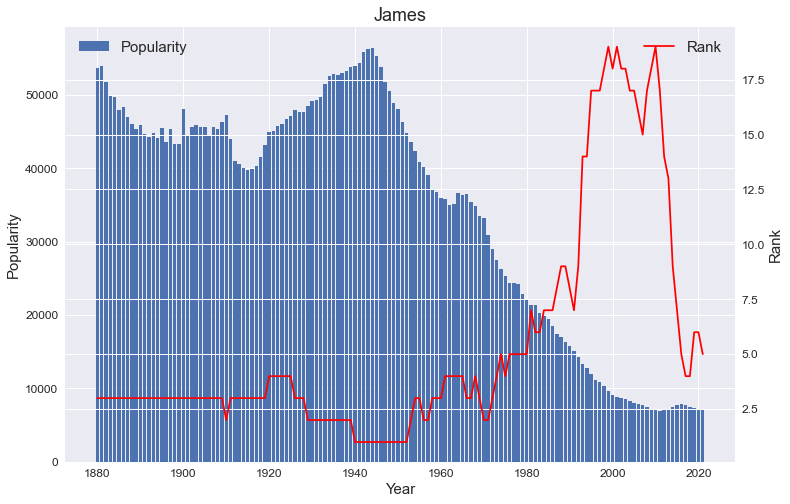

In [88]:
plot_name("James", "M", crit = "Popularity")

## Persistent vs. Spike-Fade Names

In this section, we will be finding names that have been constant over time compared to the ones which spiked suddenly due to certain special events like a popular movie/tv star.

In [104]:
pd.options.display.float_format = '{:.2f}'.format

In [105]:
agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [106]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year,Spike_Score
0,Aaban,M,120,12,2007,2019,16,2014,13.33
1,Aabha,F,51,8,2011,2021,9,2014,17.65
2,Aabid,M,16,3,2003,2018,6,2018,37.50
3,Aabidah,F,5,1,2018,2018,5,2018,100.00
4,Aabir,M,10,2,2016,2018,5,2016,50.00
...,...,...,...,...,...,...,...,...,...
112585,Zyvion,M,5,1,2009,2009,5,2009,100.00
112586,Zyvon,M,7,1,2015,2015,7,2015,100.00
112587,Zyyanna,F,6,1,2010,2010,6,2010,100.00
112588,Zyyon,M,6,1,2014,2014,6,2014,100.00


In [109]:
pers = agg.sort_values(by = "Spike_Score", ascending = True).head()

In [110]:
pers

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year,Spike_Score
50671,Joseph,M,2639021,142,1880,2021,32732,1956,1.24
31614,Elizabeth,F,1660769,142,1880,2021,20744,1990,1.25
87823,Rosa,F,175483,142,1880,2021,2230,1925,1.27
71349,Maurice,M,135386,142,1880,2021,1743,1921,1.29
26195,Delia,F,36737,142,1880,2021,491,1957,1.34


In [111]:
l = list(zip(pers.Name, pers.Gender))
l

[('Joseph', 'M'),
 ('Elizabeth', 'F'),
 ('Rosa', 'F'),
 ('Maurice', 'M'),
 ('Delia', 'F')]

Below are the list of persistent names(with no sudden spikes):

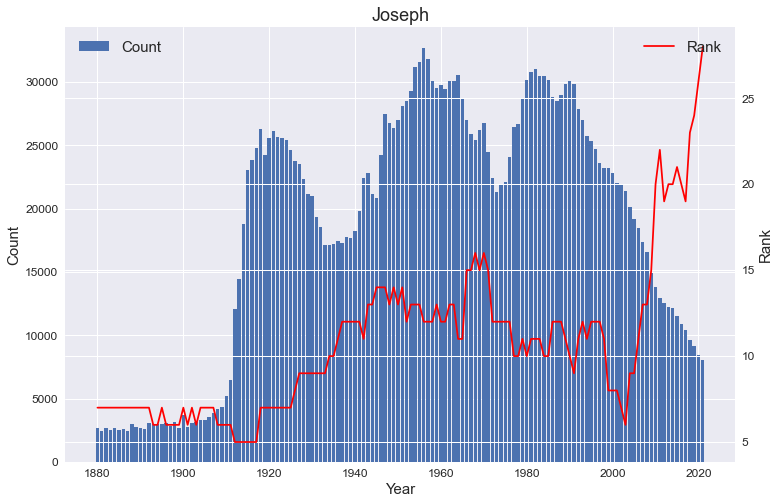

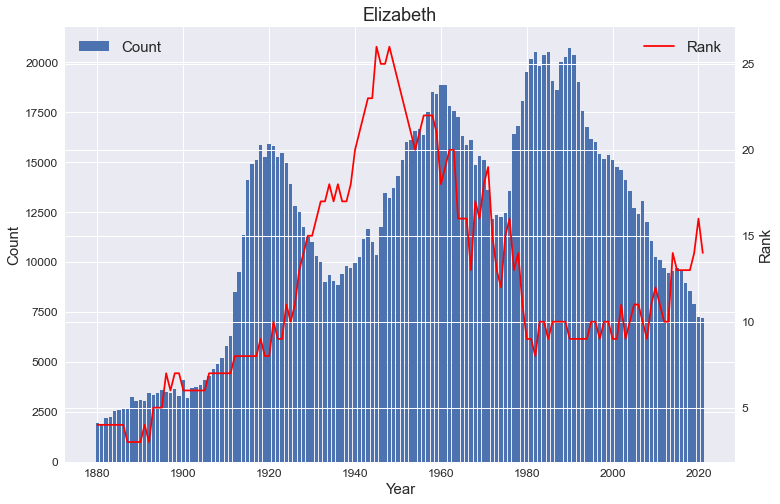

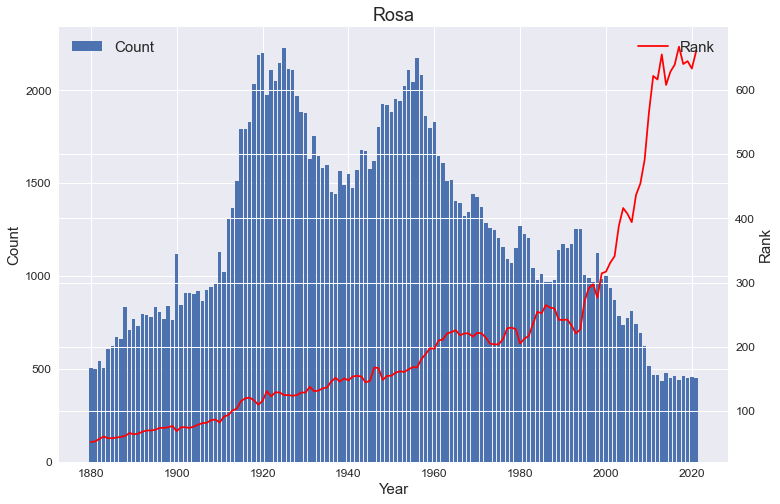

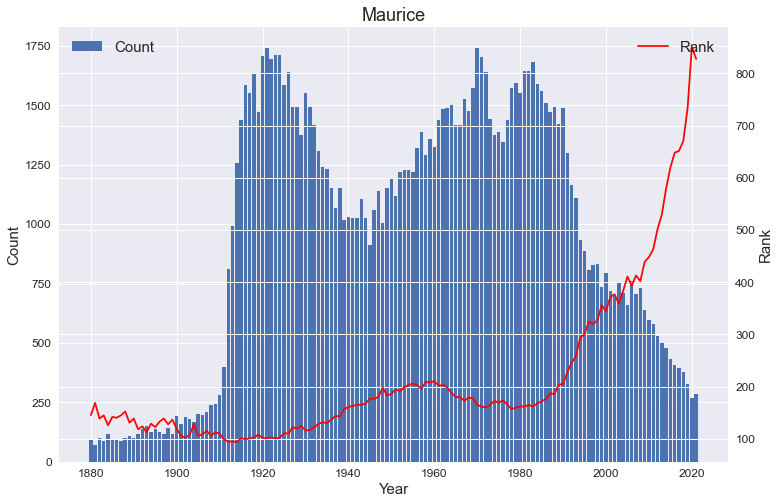

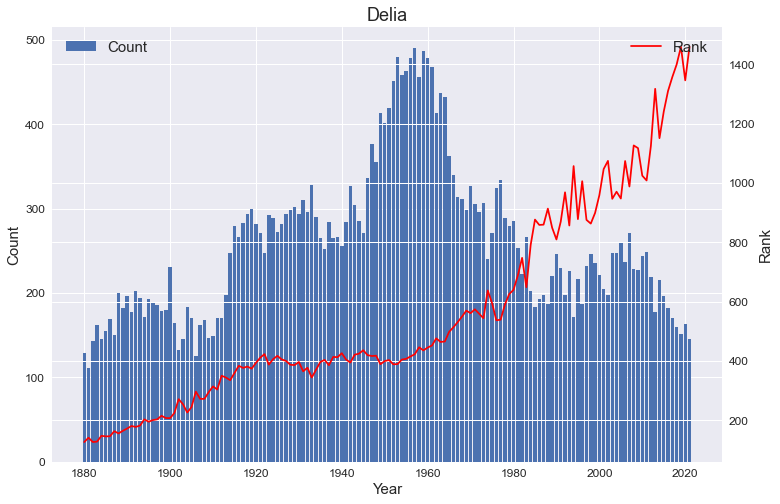

In [112]:
for name in l:
    plot_name(name = name[0], gender = name[1], crit = "Count")

In [113]:
spike = agg[(agg.Total > 1000) & (agg.No_Year > 10)].sort_values(by = "Spike_Score",
                                                                 ascending = False).head()
spike

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year,Spike_Score
58805,Kizzy,F,2345,33,1977,2021,1116,1977,47.59
26785,Deneen,F,3603,52,1947,2007,1604,1964,44.52
74433,Moesha,F,1067,14,1996,2014,426,1996,39.93
33301,Ermias,M,1319,16,1999,2021,521,2019,39.50
69407,Mareli,F,1073,25,1995,2021,411,2008,38.30


In [114]:
l2 = list(zip(spike.Name, spike.Gender))
l2

[('Kizzy', 'F'),
 ('Deneen', 'F'),
 ('Moesha', 'F'),
 ('Ermias', 'M'),
 ('Mareli', 'F')]

Below are the names which had sudden spikes due to certain events:

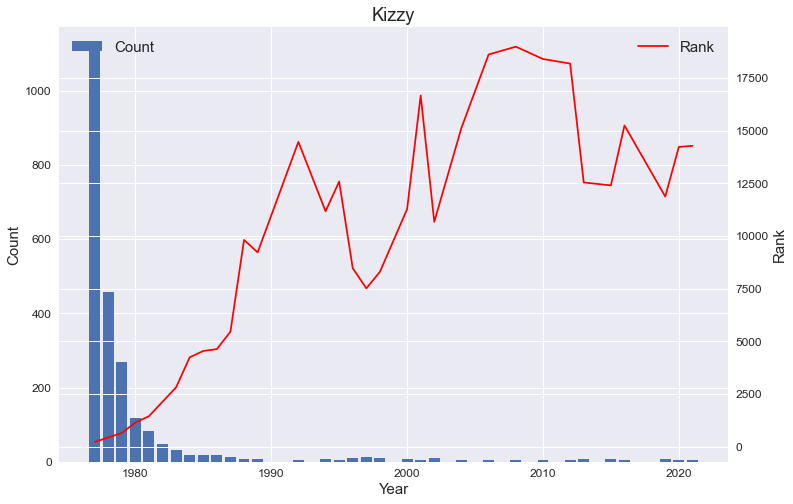

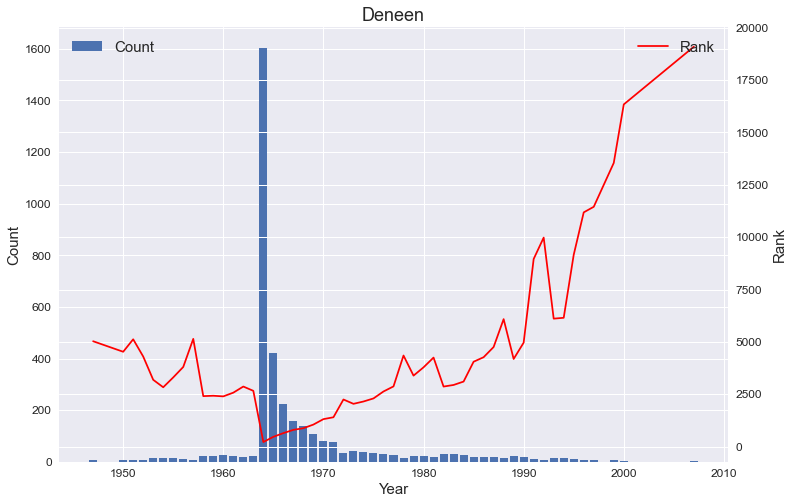

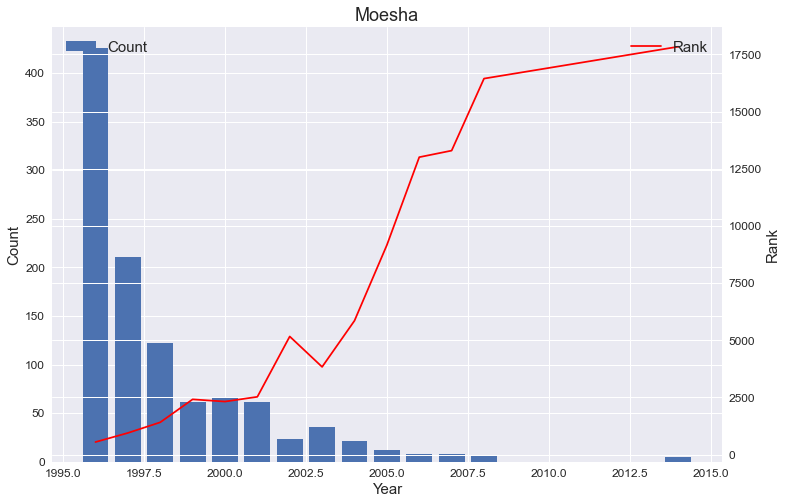

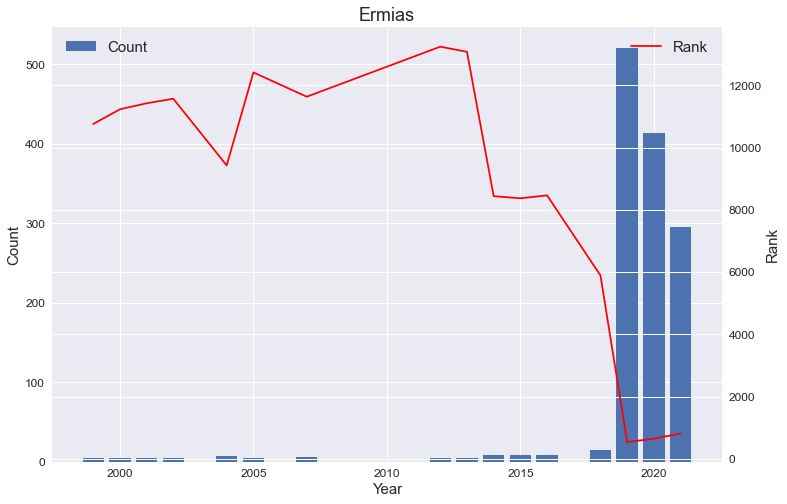

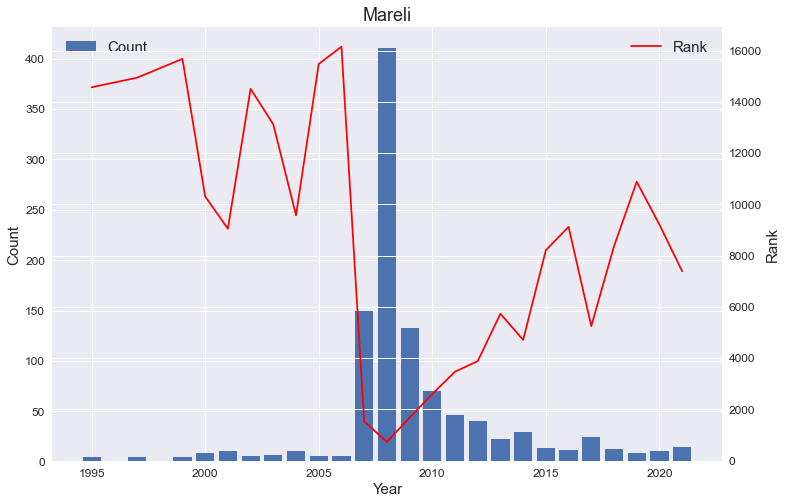

In [115]:
for name in l2:
    plot_name(name = name[0], gender = name[1], crit = "Count")

## Most Popular Unisex Names

Here we'll find the most popular names that are used for both males and females:

In [116]:
unisex = df.groupby(["Name", "Gender"]).Count.sum().unstack()
unisex

Gender,F,M
Name,,
Aaban,NaN,120.00
Aabha,51.00,NaN
Aabid,NaN,16.00
Aabidah,5.00,NaN
Aabir,NaN,10.00
...,...,...
Zyvion,NaN,5.00
Zyvon,NaN,7.00
Zyyanna,6.00,NaN


In [117]:
unisex.dropna(inplace = True)

In [118]:
unisex.head()

Gender,F,M
Name,,
Aaden,5.00,5012.00
Aadi,16.00,988.00
Aadyn,16.00,572.00
Aalijah,149.00,256.00
Aaliyah,98276.00,101.00


We will use 2 different methods to find most popular unisex names,

First method:

In [119]:
unisex_names = unisex.min(axis = 1).sort_values(ascending = False).index
unisex_names

Index(['Willie', 'Jordan', 'Leslie', 'Taylor', 'Jessie', 'Riley', 'Angel',
       'Terry', 'Jamie', 'Kelly',
       ...
       'Liyan', 'Lizette', 'Locklin', 'Loel', 'Logahn', 'Lolo', 'Loma',
       'Lorane', 'Loree', 'Katye'],
      dtype='object', name='Name', length=11278)

In [120]:
unisex.loc[unisex_names].head(10)

Gender,F,M
Name,,
Willie,146161.00,449529.00
Jordan,133216.00,387112.00
Leslie,268617.00,112835.00
Taylor,325775.00,111740.00
Jessie,168618.00,110705.00
Riley,123129.00,98453.00
Angel,97826.00,245893.00
Terry,96918.00,423636.00
Jamie,269436.00,86744.00


Second method:

In [122]:
unisex = unisex[unisex.min(axis = 1) > 10000]

In [123]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

Name
Stevie       0.00
Kerry        0.02
Elisha       0.03
Kris         0.05
Justice      0.06
            ...  
Stacey       9.59
Courtney    10.28
Jean        17.79
Ashley      53.07
Mary       271.39
Length: 121, dtype: float64

In [124]:
unisex_names2 = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index

In [126]:
unisex.loc[unisex_names2].head(10)

Gender,F,M
Name,,
Stevie,12299.00,12269.00
Kerry,48608.00,49769.00
Elisha,14046.00,14459.00
Kris,13538.00,14262.00
Justice,17782.00,18867.00
Robbie,22381.00,21114.00
Emerson,26292.00,28313.00
Frankie,34949.00,41375.00
Jackie,90925.00,78674.00
